# <center>Homework 1

##  <center>Question 1 
What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is  if you'll pass the class, while the probability drops to 0.3 if you won't pass the class.<br><br>


### *Answer* <br> 
 <center>$ P(Pass) = 0.9 $ <br> $P(Quick \mid Pass) = 0.6 $<br> $ P(Quick \mid NotPass) = 0.3 $<br>

The proportion of students who will pass the class given that they answer the question quickly => $P(Pass \mid Quick)$<br>

$ P(Quick) $ = $P(Quick \mid Pass) $ $\times$ $ P(Pass) $ + $P(Quick \mid NotPass) $ $\times$ $ P(NotPass) $
= 0.6 $\times$ 0.9+0.3 $\times$ 0.1 =0.57<br>

$P(Pass \mid Quick)$ = ($P(Quick \mid Pass) $ $\times$ $P(Pass)$)/ $ P(Quick) $ = 0.6 $\times$ 0.9 / 0.57 = 0.9474 <br>


Around 94.74 % of the students who answer this question quickly will pass the class 

##  <center>Question 2<br>
    

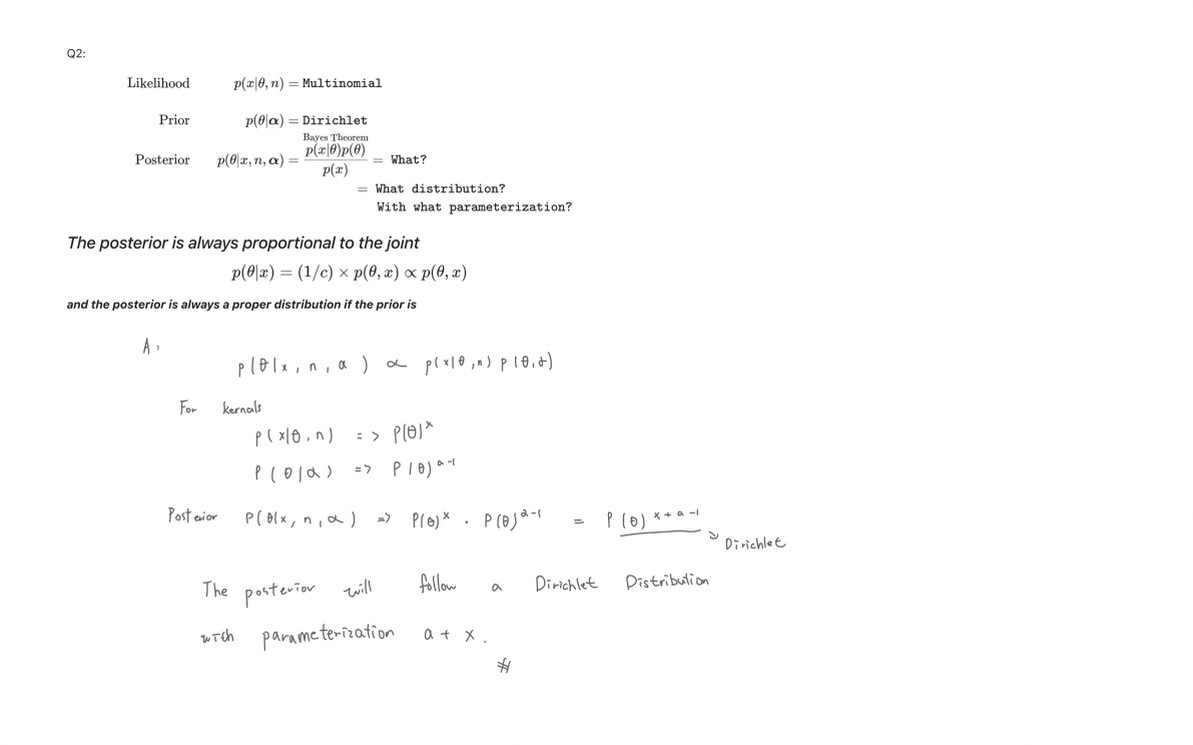

# <center>Question 3<br>
Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

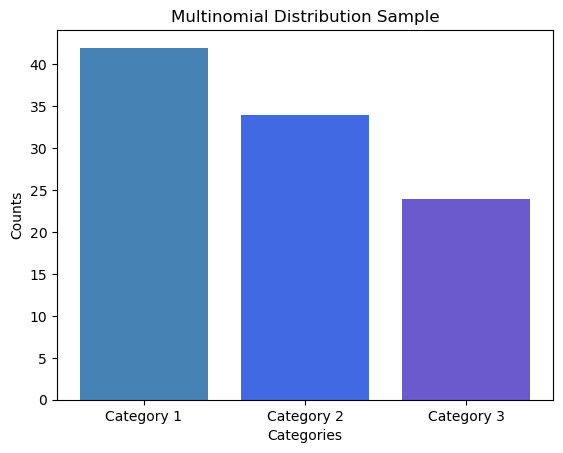

In [36]:
import numpy as np
import matplotlib.pyplot as plt
'''Multinomial distribution'''
# Parameters
n_trials = 100  
probabilities = [0.4, 0.35, 0.25]  

# Random sample 
sample = np.random.multinomial(n_trials, probabilities)

# Visualize by bar Plot
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, sample, color=['steelblue', 'royalblue', 'slateblue'])
plt.title('Multinomial Distribution Sample')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()


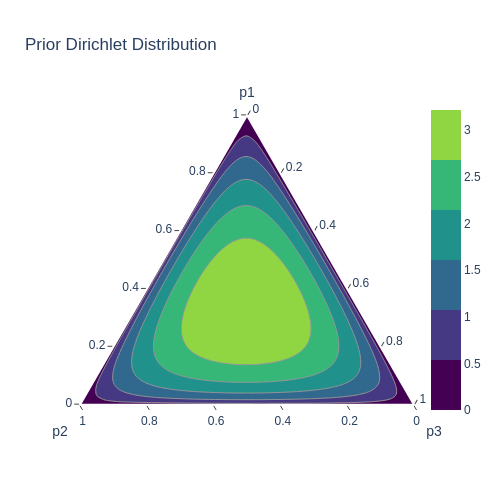

In [37]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import numpy as np

# p1p2p3_scatter = stats.dirichlet(alpha=np.array([1.0, 1.0, 1.0])).rvs(size=100)
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([1.5, 1.5, 1.5])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# https://plotly.com/python/ternary-contour/Links to an external site. 
fig = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                colorscale='Viridis',
                                showscale=True)
fig.update_layout(
    title="Prior Dirichlet Distribution",
    ternary=dict(
        sum=1,
        aaxis=dict(title='p1', min=0, linewidth=2, ticks='outside'),
        baxis=dict(title='p2', min=0, linewidth=2, ticks='outside'),
        caxis=dict(title='p3', min=0, linewidth=2, ticks='outside')))
fig.show('png')

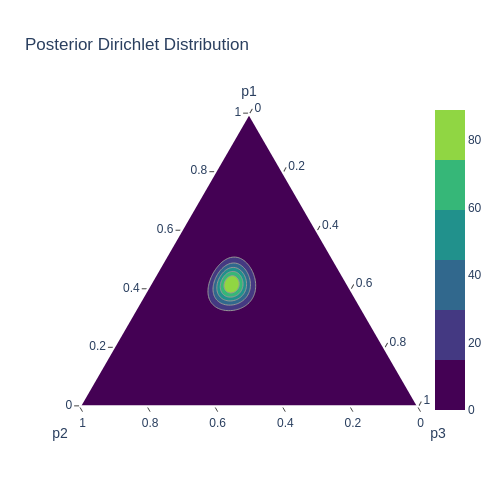

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.figure_factory as ff



# Prior parameters (Dirichlet distribution)
alpha_prior = np.array([1.5, 1.5, 1.5])  # Prior alpha values

# Use sample counts to update the prior to get the posterior alpha values
alpha_posterior = alpha_prior + sample

# Grid for the simplex (for 3 categories)
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Compute the Dirichlet distributions (prior and posterior)
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

# Calculate densities for the prior and posterior distributions
prior_densities = dirichlet_prior.pdf(p.T)
posterior_densities = dirichlet_posterior.pdf(p.T)

# Create ternary plot for the posterior distribution
fig = ff.create_ternary_contour(
    p.T, posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    colorscale='Viridis'
)
fig.update_layout(
    title="Posterior Dirichlet Distribution",
    ternary=dict(
        sum=1,
        aaxis=dict(title='p1', min=0, linewidth=2, ticks='outside'),
        baxis=dict(title='p2', min=0, linewidth=2, ticks='outside'),
        caxis=dict(title='p3', min=0, linewidth=2, ticks='outside')))
# Show the plot for the posterior
fig.show('png')
